# Introduction to Python - Numpy and Matplotlib
## Problem Set

In [1]:
# Authors: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-10-27 17:59:13.187892


## Question 1
(a) Create random vector with five elements and print the average of the vector. Then, replace the maximum value by 0 and print the vector and its average again.

(b) Use NumPy's **random** package to get N draws from a standard normal distribution (google to get the name of the corresponding function and its syntax!) and store them in a NumPy array. Find the sample average and standard deviation for **N = 10**, **N = 1000** and **N = 1000000**.

(c) For the last case in question (a) with **N = 1000000**, use an index array or Numpy's **where** function to find the share of draws that is either less than -1.96 or greater than 1.96. What's your expectation what this share should be?

(d) Create a two-dimensional 4-by-4 NumPy array **Ar** with elements from 1 to 16. A quick way to do is using Python **range** function and the **shape** method of NP arrays. Recall from linear algebra that multiplying any matrix with the identity matrix **Id** just results in same matrix (i.e. $I \cdot Ar = Ar \cdot I = Ar$). Confirm this using your array **Ar**. What happens if you multiply **Ar** with an array of the same dimension that consists only of 1s?

(e) Write a function **get_diag** that takes a *square* matrix of dimension **nn** and returns a flat array of length **nn** that contains the elements on the matrix' diagonal. The first thing the function should do is checking if the input is a square array and give an error message otherwise. You could this in many ways; one neat option is an **assert** statement (check the documentation!). Alternatively, you could use a print statement and interrupt the function with **Return None**.

In [2]:
import numpy as np

In [3]:
## question (a)
import random
A = np.zeros(5)
for i in range(5):
    A[i] = random.random()
# A=np.random.uniform(0,1,5) #Alternative
print(A)
print(A.mean())

A[A.argmax()]=0
print(A)
print(A.mean())

[0.62313475 0.57381207 0.22271763 0.16812751 0.33385235]
0.3843288618399935
[0.         0.57381207 0.22271763 0.16812751 0.33385235]
0.2597019126521629


In [4]:
## question (b)
N = [10, 1000, int(1e+6)]

for item in N:
    A = np.random.normal(0, 1, item)
    ave = A.mean() 
    dev = A.std()
    print("For N = {}, the mean is {} and the standard deviation is {}.".format(item, ave, dev))

For N = 10, the mean is 0.4315065973460464 and the standard deviation is 0.9047202873020269.
For N = 1000, the mean is -0.04450103146966838 and the standard deviation is 0.9990165791210999.
For N = 1000000, the mean is -0.0011019948197487507 and the standard deviation is 0.9994163231007958.


In [5]:
## question (c)

N = int(1e+6)
## use a combination of two index arrays
A_sub = A[(A > 1.96) | (A < - 1.96)] 
## find share of complete sample
x = len(A_sub) / N

## alternative here:
# x = len( A[A > 1.96] ) + len( A[A < - 1.96] ) / N

print("The share of draws less than -1.96 or greater than 1.96 is {}.".format(x))

The share of draws less than -1.96 or greater than 1.96 is 0.049899.


In [6]:
## question (d)

## create matrix Ar
Ar = np.array(range(1, 17))
Ar.shape = (4,4)
## create identity matrix and ones matrix
Id = np.eye(4)
E = np.ones(4)
## multiplying with identity matrix returns A
print(Id @ Ar)
print(Ar @ Id)
## multiplying with ones matrix returns row and column sums, respectively
print(E @ Ar) 
print(Ar @ E) 

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
[28. 32. 36. 40.]
[10. 26. 42. 58.]


In [7]:
## question (e)

def get_diag(A):
    
    assert A.shape[0] == A.shape[1], "The matrix must be square!"
    
    ## Alternative:
#     if not A.shape[0] == A.shape[1]:
#         print("The matrix must be square!")
#         return None
    
    n = A.shape[0]
    D = np.zeros(n)
    
    for ind in range(n):
        D[ind] = A[ind, ind]
    
    return D

print(get_diag(Ar))

## test with a non-square matrix
B = np.array([[1,2,3]])
# print(get_diag(B))

[ 1.  6. 11. 16.]


## Question 2

Consider the polynomial expression
\begin{equation*}
	p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_N x^N = \sum_{n=0}^N a_n x^n,
\end{equation*}
where $x$ is a scalar number.

(a) Write a Python function **poly(xx, coeff)** that implements $p(x)$ (i.e. evaluates the polynomial) given a point **xx** and a list of coefficients **coeff** ($= a_0,...,a_N$). Use a loop with **enumerate()**.

(b) Write a new function **poly_np(xx, coeff)** that does the same job, but uses NumPy arrays and vectorized operations, rather than any form of Python loop. Hint: Use **np.cumprod()**.

(c) Using **%time**, check how long it takes for both functions to run when **len(coeff)** = 50000 (you can use arbitrary values for the elements in **coeff**).


#### (a)

As an example, let's compute $p(x) = 1 + 2x + 4x^2$ at $x = 2$, which gives $p(2) = 21$. Using **enumerate()**, the loop is straightforward:

In [8]:
def poly(x, coeff):
    # initialize s as 0
    s = 0
    for (i, a) in enumerate(coeff):
        # for each iteration, add the corresponding term to s
        s = s + a * x**i
        
    return s

poly(2, [1,2,4])

21

Note that we can implement the exact same algorithm in one line:

In [9]:
# def poly(x, coeff):
#     return sum(a * x**i for i, a in enumerate(coeff))

# poly(2, [1, 0,1,0,1])

#### (b) 

Using **np.cumprod()** on a sequence gives an array where at each position, you have the product of all elements that come before or at that position in the original array. For example, **np.cumprod([2,3,4,5])** would return **[2,6,24,120]** as a NP array. For the function here, we need to apply **np.cumprod()** on an array **[1, x, x, x, ..]**, which would return **[1, x, x^2, x^3,...]**. We can use the inner product of this array and **coeff**.

In [10]:
import numpy as np
def poly_np(x, coeff):
    # define X = [1 x x ...]
    X = np.empty(len(coeff))
    X[0] = 1
    X[1:] = x
    # using cumprod on X gives [1 x x^2 x^3 ...]
    y = np.cumprod(X)
    # compute and return inner product
    return coeff @ y

poly_np(2, [1,2,4])

21.0

As an alternative, note that a vectorized operations also works if *the array is in the exponent*. In other words, implementing something like $x^{(0,1,2)}$ in Python, where $x$ is a scalar, would give $(x^0, x^1, x^2)$. Again, this works only if the sequence $(0,1,2)$ is a NumPy array. 

In [11]:
def poly_np2(x, coeff):
    return coeff @ x**np.linspace(0,len(coeff)-1,len(coeff))

poly_np2(2, [1,2,4])

21.0

#### (c) 

In [12]:
# use random module to assign arbitrary values to coeff
N = 50000
coeff = np.random.uniform(0, 1, N)
x = 0.1

With 50000 elements in **coeff**, there are notable differences in the running times across the functions, with the **poly_np** function using **np.cumprod()** being by far the fastest - the difference compared to the loop-implementation in Vanilla Python is a factor of about 30 (depending on your computer!) -- another example for the speed of vectorized operations.

In [13]:
%time print(poly(x, coeff))
%time print(poly_np(x, coeff))
%time print(poly_np2(x, coeff))

0.5555968593789616
CPU times: user 38.2 ms, sys: 1.73 ms, total: 39.9 ms
Wall time: 33.4 ms
0.5555968593789616
CPU times: user 1.32 ms, sys: 604 µs, total: 1.93 ms
Wall time: 1.31 ms
0.5555968593789616
CPU times: user 4.95 ms, sys: 700 µs, total: 5.65 ms
Wall time: 3.16 ms


## Question 3

Compute an approximation to $\pi$ with the Monte Carlo method using **Numpy**. Your hints are as follows:
- If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.
- If $U_1,...,U_n$ are iid copies of $U$, then, as $n$ gets large, the fraction that fall in $B$ converges to the probability of landing in $B$
- Recall that for a circle, $area = \pi * radius^2$

(Source: lectures.quantecon.org, An Introductory Example, Exercise 3)

In [14]:
import numpy as np

# function throws gives the fraction of throws that land in the unit cycle = area of unit cycle 
def area(n):
    count = 0
    for i in range(n):
        x, y = np.random.uniform(0,1), np.random.uniform(0,1) # x-coordinate, y-coordinate
        if np.sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
            count += 1
    return count/n

pi = area(100000) / 0.5**2;
print(pi)
## for comparison
print(np.pi)


3.14816
3.141592653589793


## Question 4

(a) Draw the function $y=log(x)$ on the interval from 1 to 10

(b) Draw the function $y=x^3$ on the interval from -10 to 10. Compile the plot once with N=5 and with N=100 individual values for the x-axis, both in the same figure. Set two different colors for the to lines.


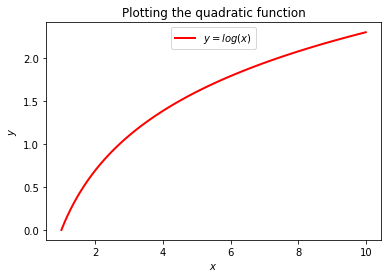

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## (a) N=5
x = np.linspace(1,10,100)
y = np.log(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = log(x)$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

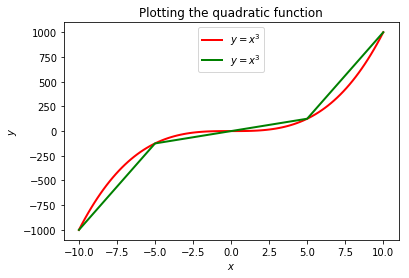

In [16]:
## (b) N=100
x100 = np.linspace(-10,10,100)
y100 = x100**3
x5 = np.linspace(-10,10,5)
y5 = x5**3

fig, ax = plt.subplots()
ax.plot(x100, y100, 'r-', linewidth=2, label = '$y = x^3$')
ax.plot(x5, y5, 'g-', linewidth=2, label = '$y = x^3$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

## Question 5

Consider the utility function $U(B,C)=B^{\alpha} C^{(1-\alpha)}$ of a Oktoberfest visitor consuming beer (B) and chicken (C).

(a) Write a function that returns the utilily depending on the amount of consumed chicken and beers

(b) Plot the utility as a function of the amount of beer with $\alpha=0.7$ and $C=2$. The range of beers should be from 0 to 10.

(C) Plot the isoquants of the same utility for all combination of C and B in the range from 0 to 10.

(d) Consider now the prices of $p_B=10 €$ and $p_C=10€$ and a budget of 55€. Draw the budgetline in the graph from question (c) and guess what the optimal consumption might be. You can set the limits of the x and the y axis by **ax.set_xlim([xlim,xmax])** and **ax.set_ylim([ylim,ymax])**.

In [17]:
## (a)
def utility(C,B,alpha):
    return (C**alpha)*(B**(1-alpha))

print (utility(3,4,0.5))

3.4641016151377544


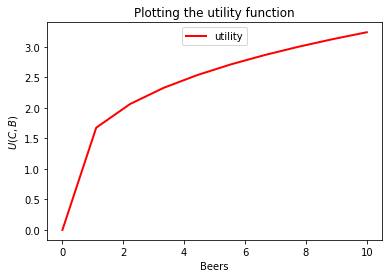

In [18]:
## (b)
B = np.linspace(0,10,10)
u = utility(2, B, 0.7)
fig, ax = plt.subplots()
ax.plot(B, u, 'r-', linewidth=2, label = 'utility')
ax.set_title('Plotting the utility function')
ax.set_xlabel('Beers')
ax.set_ylabel('$U(C,B)$')
ax.legend(loc = 'upper center')

(0, 10)

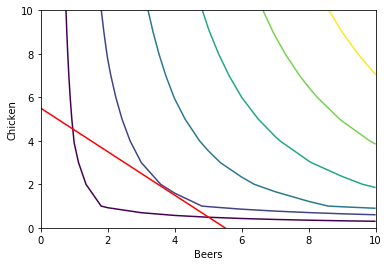

In [19]:
## (c)
N = 11
## interpolate both production factors over equidistant grid
C = np.linspace(0, 10, N)
B = np.linspace(0, 10, N)
## use meshgrid function 
X, Y = np.meshgrid(C, B)
U = utility(X, Y, 0.7)

## plot contour
fig, ax = plt.subplots()
ax.contour(C, B, U, cmap = 'viridis')
ax.set_xlabel('Beers')
ax.set_ylabel('Chicken')

## (d)
## Budget constraint
def chicken(B):
    return (5.5-B)

ax.plot(B,chicken(B),'r')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

## Question 6

The file *Capacities.csv* contains country-level data on electricity generation capacity, and more specifically on capacity of "clean" (i.e. non-carbon emitting) technologies. It consists of three columns: the first columns contains the combined capacity for hydro and nuclear power plants, while the second columns contains the combined capacity for wind and solar installations (all in TW). The third columns contains the overall *capacity factor*, that is, the share of potential electricity that is actually produced. In other words, a capacity factor of 50% would imply that the a plant runs half of the time. In this question, we are interested in how the capacity factor depends on how wind and solar capacity are in the system.

(a) Each column consists of 600 *country-year* observations (30 OECD countries over 20 years). Use Numpy's **loadtxt** function to load the data as a 600-by-3 array. (A side note: there are better ways to work with this kind of data in Python than a Numpy array, as we will see in next lecture).

(b) Visualize the data using a scatter plot, where each axis corresponds to a capacity measure, while the color (or the size) of the markers is determined by the level of the capacity factor.

(c) If you are not interested in absolute capacity levels, an alternative is to plot the capacity factor against the *relative* capacity of wind and solar, i.e. their share in total renewable capacity. Use Matplotlib's **plot** method, but with markers instead of lines. Also, include only those observations that have a wind & solar share of more than 1 percent (Hint: use a logical Nunpy array).

Text(0,0.5,'Capacity Wind & Solar')

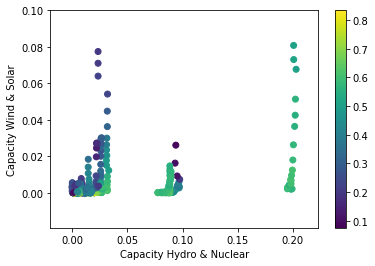

In [20]:
import seaborn

## (a)
X = np.loadtxt('data/Capacities.csv')

cap_rn1 = X[:,0]
cap_rn2 = X[:,1]
cf_rn = X[:,2]

## (b)

fig, ax = plt.subplots()
im = ax.scatter(cap_rn1, cap_rn2, c = cf_rn, cmap='viridis')
fig.colorbar(im);  # show color scale
ax.set_xlabel('Capacity Hydro & Nuclear')
ax.set_ylabel('Capacity Wind & Solar')

Text(0,0.5,'Capacity Factor')

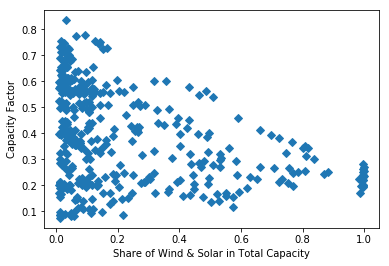

In [21]:
## (c)

## get relative capacity of wind + solar
sh_ws = (cap_rn2 / (cap_rn1 + cap_rn2))

fig, ax = plt.subplots()
## Use logical arrays to exclude observations where sh_ws < 0.01
ax.plot(sh_ws[sh_ws >= 0.01], cf_rn[sh_ws >= 0.01], 'D')
ax.set_xlabel('Share of Wind & Solar in Total Capacity')
ax.set_ylabel('Capacity Factor')